In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [44]:
from darts.datasets import USGasolineDataset
df_gasoline = USGasolineDataset().load().pd_dataframe()
df_gasoline

component,Gasoline
Week,
1991-02-08,6621.0
1991-02-15,6433.0
1991-02-22,6582.0
1991-03-01,7224.0
1991-03-08,6875.0
...,...
2021-04-02,8781.0
2021-04-09,8944.0
2021-04-16,9104.0


<AxesSubplot:xlabel='Week'>

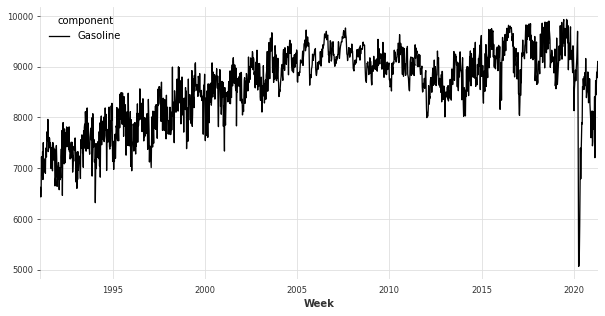

In [45]:
df_gasoline.plot(figsize=(10,5))

In [46]:
df = df_gasoline.loc[:'2000']
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

C:\Users\21ckw\AppData\Local\Temp/ipykernel_4964/1209931625.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\21ckw\AppData\Local\Temp/ipykernel_4964/1209931625.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



component,Gasoline,month,year
Week,,,
1991-02-08,6621.0,2,1991
1991-02-15,6433.0,2,1991
1991-02-22,6582.0,2,1991
1991-03-01,7224.0,3,1991
1991-03-08,6875.0,3,1991


# 시각화

# line plot

## line plot 기본

In [47]:
px.line(data_frame=df, x= df.index, y= 'Gasoline')

## line plot 연도별

In [15]:
px.line(data_frame=df, x= df.index, y= 'Gasoline',color='year')

## line plot 월별

In [40]:
df_m = df.resample('M').mean()['Gasoline'].to_frame()
df_m['year'] = df_m.index.year
df_m['month'] = df_m.index.month

In [41]:
fig = px.line(data_frame=df_m, x= 'month', y= 'Gasoline',color='year')
fig.show()

In [43]:
fig = px.line(data_frame= df_m.loc[:'1993'], x= 'month', y= 'Gasoline',color='year', text='Gasoline')
fig.update_traces(textposition='bottom right')
fig.show()

In [ ]:
px.d()

## box

In [20]:
fig = px.box(data_frame=df, x='year', y =['Gasoline'] )
fig.show()

In [23]:
fig = px.box(data_frame=df.loc[:'1995'], x='year', y =['Gasoline'], color='month' )
fig.show()

In [21]:
fig = px.box(data_frame=df, x='month', y ='Gasoline')
fig.show()

# scatter plot

In [75]:
df.head()

,container,Total,month,year
date,,,,
2007-01-01,204.7,2828.2,1,2007
2007-02-01,181.0,2512.5,2,2007
2007-03-01,202.8,2850.2,3,2007
2007-04-01,220.1,3027.7,4,2007
2007-05-01,220.8,3139.4,5,2007


In [26]:
fig = px.scatter(data_frame=df, x=df.index, y ='Gasoline',color='year')
fig.show()

# Linear and Non-Linear Trendlines in Python

In [76]:
df_tips = px.data.tips()
fig = px.scatter(df_tips, x="total_bill", y="tip", trendline="ols")
fig.show()

# Time Series and Date Axes in Python

## px.area 다변량 

In [27]:
df_stock = px.data.stocks(indexed=True)-1
df_stock.head()

company,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.018172,0.011943,0.061881,-0.040032,0.053526,0.015988
2018-01-15,0.032008,0.019771,0.053240,-0.029757,0.049860,0.020524
2018-01-22,0.066783,-0.019943,0.140676,0.016858,0.307681,0.066561
2018-01-29,0.008773,-0.082857,0.163374,0.018357,0.273537,0.040708


In [28]:
fig = px.area(df_stock, facet_col="company", facet_col_wrap=2)
fig.show()

In [31]:
# fig = px.area(df[['Gasoline']])
# fig.show()

## rangeslider

In [48]:
df_stock = px.data.stocks(indexed=True)-1
fig = px.line(data_frame=df_stock['GOOG'].to_frame(), x= df_stock.index, y= 'GOOG')
fig.update_xaxes(rangeslider_visible=True)
fig.show()